### Example notebook

In [1]:
# Import the model
import model

In [38]:
# Initialize a network
network = model.network()

In [39]:
network.graph

{0: ([4], 0.13903206795047895),
 1: ([2, 4], 0.7436796665681685),
 2: ([1, 3], 0.7310753329633074),
 3: ([2, 4], 0.5084210173578928),
 4: ([0, 3, 1], 0.6882145222362671)}

In [40]:
# Add one node at a time
network.add_node()
network.graph

{0: ([4], 0.13903206795047895),
 1: ([2, 4, 5], 0.7436796665681685),
 2: ([1, 3], 0.7310753329633074),
 3: ([2, 4], 0.5084210173578928),
 4: ([0, 3, 1, 5], 0.6882145222362671),
 5: ([1, 4], 0.35011134978281533)}

In [41]:
network.add_node()
network.graph

{0: ([4], 0.13903206795047895),
 1: ([2, 4, 5, 6], 0.7436796665681685),
 2: ([1, 3], 0.7310753329633074),
 3: ([2, 4, 6], 0.5084210173578928),
 4: ([0, 3, 1, 5], 0.6882145222362671),
 5: ([1, 4], 0.35011134978281533),
 6: ([3, 1], 0.26453049879709856)}

In [42]:
# Generate the whole network in one step
network = model.network()
network.graph

{0: ([3, 1], 0.1908050576591932),
 1: ([0, 2], 0.1355139345396743),
 2: ([1, 3], 0.3877271410366444),
 3: ([0, 2, 4], 0.8773938798416161),
 4: ([3], 0.08230608541109063)}

In [43]:
network.generate_network(15)
network.graph

{0: ([3, 1], 0.1908050576591932),
 1: ([0, 2], 0.1355139345396743),
 2: ([1, 3, 5, 7], 0.3877271410366444),
 3: ([0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 14], 0.8773938798416161),
 4: ([3], 0.08230608541109063),
 5: ([3, 2, 6, 7, 9, 10], 0.442421835466591),
 6: ([5, 3, 12], 0.334274354571346),
 7: ([5, 2, 8], 0.4100097786967255),
 8: ([7, 3], 0.3066474934728127),
 9: ([5, 3, 11, 13], 0.6923347789191063),
 10: ([5, 3, 14], 0.7684331474180696),
 11: ([9, 3], 0.526038940651932),
 12: ([3, 6, 13], 0.6925713065068624),
 13: ([12, 9], 0.35917672105714926),
 14: ([10, 3], 0.11388752602843633)}

{0: ([1, 4], 0.28540307233995443), 1: ([0, 2], 0.610701206817331), 2: ([1, 3], 0.009263448410255615), 3: ([2, 4, 5], 0.8613350459767889), 4: ([3, 0, 5], 0.73894882222337), 5: ([3, 4], 0.7799950626398485)} 

{0: ([1, 4], 0.28540307233995443), 1: ([0, 2], 0.610701206817331), 2: ([1, 3], 0.009263448410255615), 3: ([2, 4, 5, 6], 0.8613350459767889), 4: ([3, 0, 5], 0.73894882222337), 5: ([3, 4, 6], 0.7799950626398485), 6: ([3, 5], 0.60505851079885)} 

{0: ([1, 4], 0.28540307233995443), 1: ([0, 2], 0.610701206817331), 2: ([1, 3], 0.009263448410255615), 3: ([2, 4, 5, 6, 7], 0.8613350459767889), 4: ([3, 0, 5], 0.73894882222337), 5: ([3, 4, 6, 7], 0.7799950626398485), 6: ([3, 5], 0.60505851079885), 7: ([3, 5], 0.4615130619614637)} 

{0: ([1, 4], 0.28540307233995443), 1: ([0, 2], 0.610701206817331), 2: ([1, 3], 0.009263448410255615), 3: ([2, 4, 5, 6, 7, 8], 0.8613350459767889), 4: ([3, 0, 5, 8], 0.73894882222337), 5: ([3, 4, 6, 7], 0.7799950626398485), 6: ([3, 5], 0.60505851079885), 7: ([3, 5], 

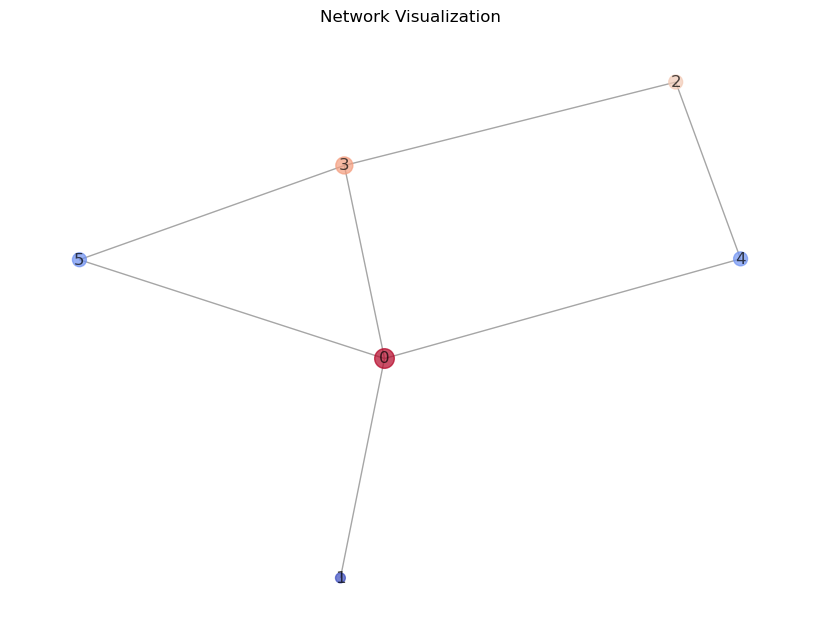

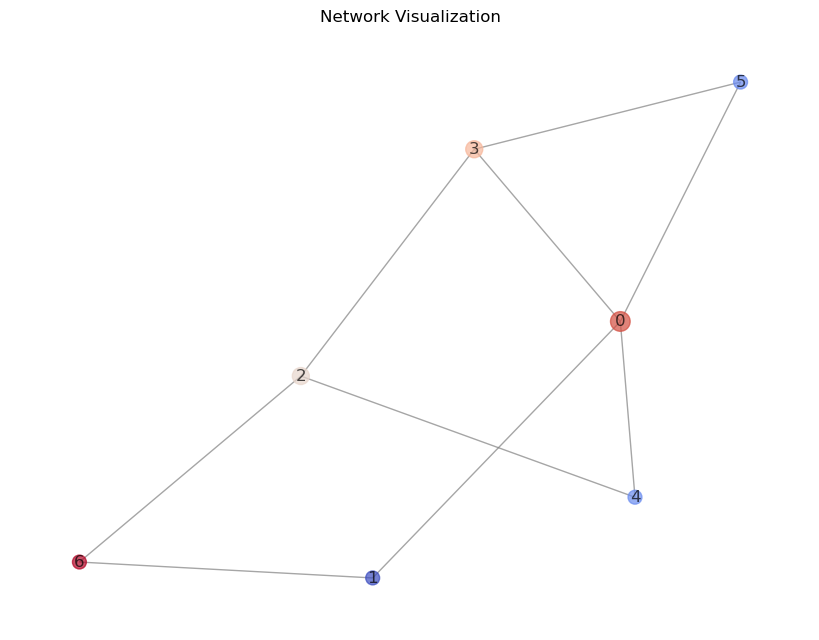

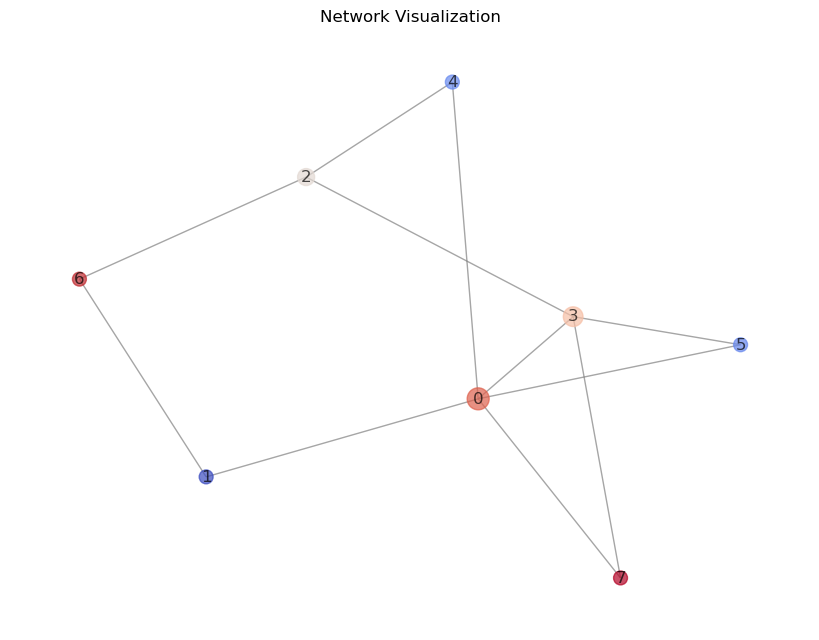

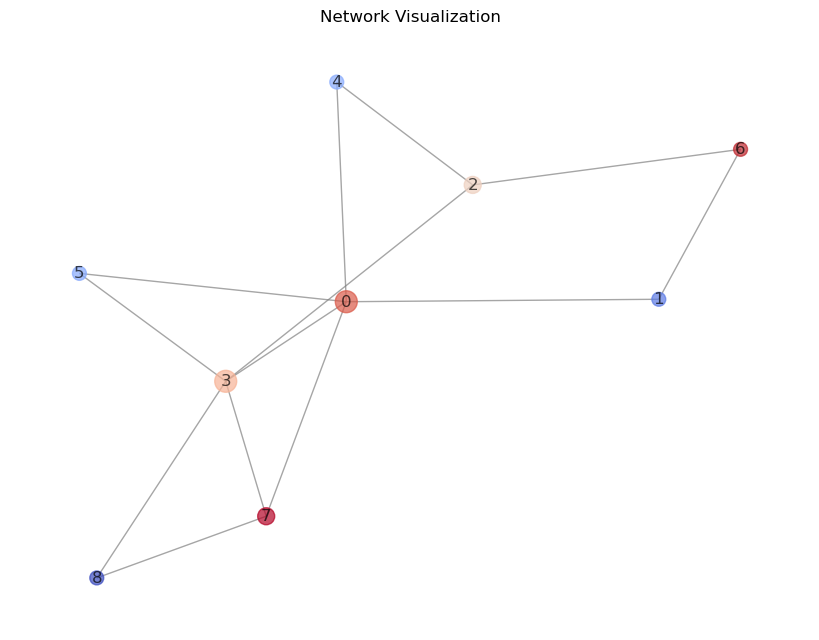

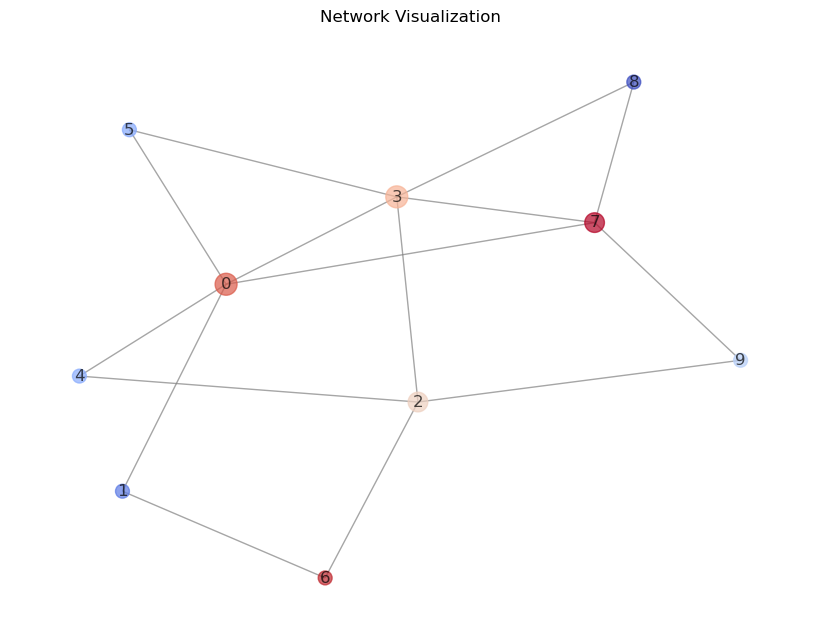

In [4]:
# Import the model
import model
import networkx as nx
import matplotlib.pyplot as plt
m_zero = 5
network = model.network(m0= m_zero)
for i in range(5):
    network.generate_network(m_zero+i+1)

    dict_t = network.graph

    G = nx.Graph()

    # Add nodes
    for node, (edges, fitness) in dict_t.items():
        G.add_node(node, fitness=fitness)

    # Add edges
    for node, (edges, fitness) in dict_t.items():
        for neighbor in edges:
            G.add_edge(node, neighbor)


    pos = nx.spring_layout(G)

    # Extract fitness values from the network dictionary
    fitness_values = [data['fitness'] for _, data in G.nodes(data=True)]

    # Calculate node degrees
    node_degrees = dict(G.degree())

    # Extract node sizes based on degrees
    node_sizes = [50 * node_degrees[node] for node in G.nodes()]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=fitness_values, cmap='coolwarm', edge_color='gray', alpha=0.7)
    plt.title("Network Visualization")
    plt.xlabel("Node ID")
    plt.ylabel("Fitness")
    #plt.colorbar(label='Fitness')
    plt.show()